In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('../Country Quater Wise Visitors Imputed.csv')
df.head()

,Country of Nationality,2014 1st quarter (Jan-March),2014 2nd quarter (Apr-June),2014 3rd quarter (July-Sep),2014 4th quarter (Oct-Dec)),2015 1st quarter (Jan-March),2015 2nd quarter (Apr-June),2015 3rd quarter (July-Sep),2015 4th quarter (Oct-Dec),2016 1st quarter (Jan-March),...,2018 3rd quarter (July-Sep),2018 4th quarter (Oct-Dec),2019 1st quarter (Jan-March),2019 2nd quarter (Apr-June),2019 3rd quarter (July-Sep),2019 4th quarter (Oct-Dec),2020 1st quarter (Jan-March),2020 2nd quarter (Apr-June),2020 3rd quarter (July-Sep),2020 4th quarter (Oct-Dec)
0,Canada,33.1,14.5,15.7,36.7,34.2,14.5,15.9,35.4,34.5,...,16.19,32.94,36.4,14.3,14.8,34.5,88.9,0.3,2.0,8.8
1,United States Of America,25.7,22.0,20.6,31.7,26.4,22.1,19.6,31.9,25.7,...,20.23,31.22,26.9,21.4,19.3,32.3,84.5,0.9,3.8,10.8
2,Argentina,46.8,15.6,13.9,23.7,40.6,17.5,14.6,27.3,41.7,...,15.71,20.22,41.5,16.8,16.7,25.1,97.8,0.2,0.5,1.5
3,Brazil,31.0,18.8,18.7,31.5,34.8,19.0,19.6,26.6,29.7,...,18.95,28.00,32.1,19.5,18.7,29.7,92.6,0.9,2.3,4.1
4,Mexico,23.6,20.3,26.5,29.6,28.1,21.3,23.4,27.2,25.4,...,22.60,31.34,25.0,21.8,21.9,31.2,95.8,0.5,1.2,2.4


In [15]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

def getDate(x):
    d = x.split(' ')[0: 2]
    d[1] = str(int(d[1][0])*3)
    return parser("-".join(d))

In [16]:
def generateDate():
    x = []
    for series_name, series in df.items():
        if series_name == 'Country of Nationality': continue
        x.append(getDate(series_name))
    return x

In [17]:
new_df = pd.DataFrame()
new_df['time'] = generateDate()
for series_name, series in df.T.items():
    if series_name == 1:
        new_df['value'] = list(series)[1:]

In [18]:
new_df.to_csv('data.csv', index=False) 

In [19]:
df2 = pd.read_csv('data.csv', parse_dates=['time'], header=0).squeeze('columns')
df3 = pd.read_csv('data.csv', parse_dates=['time'], header=0, index_col='time').squeeze('columns')
# df2['hello'] = df2.index
df2.head()

,time,value
0,2014-03-01,25.7
1,2014-06-01,22.0
2,2014-09-01,20.6
3,2014-12-01,31.7
4,2015-03-01,26.4


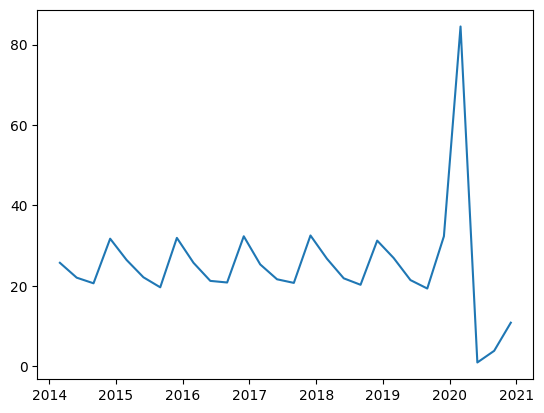

In [20]:
plt.plot(df2['time'], df2['value'])
plt.show()

predicted=21.027372, expected=20.230000
predicted=32.260418, expected=31.220000
predicted=26.616906, expected=26.900000
predicted=22.125562, expected=21.400000
predicted=20.352302, expected=19.300000
predicted=31.102871, expected=32.300000
predicted=27.407853, expected=84.500000
predicted=150.109124, expected=0.900000
predicted=34.886835, expected=3.800000
predicted=59.706075, expected=10.800000
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -101.693
Date:                Wed, 10 Apr 2024   AIC                            219.387
Time:                        00:21:05   BIC                            229.138
Sample:                             0   HQIC                           222.091
                                 - 27                                         
Covariance Type:                  opg           

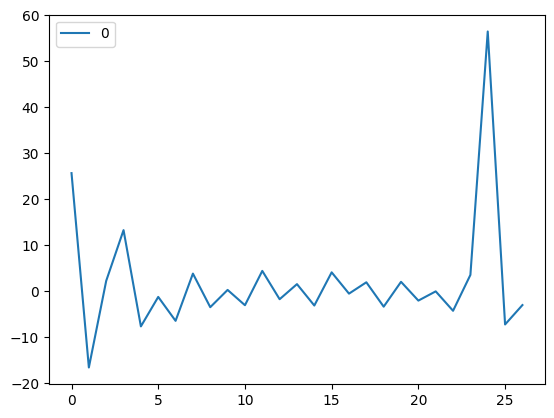

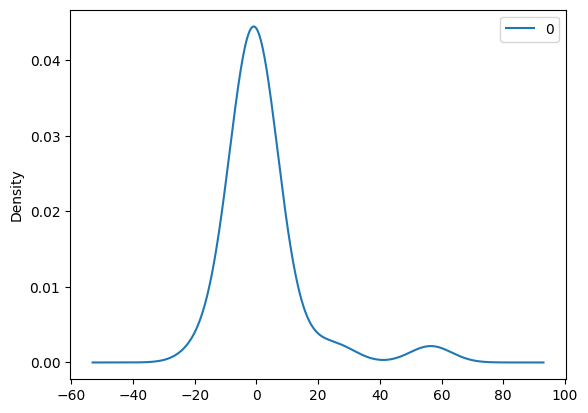

               0
count  27.000000
mean    2.087785
std    13.146858
min   -16.552640
25%    -3.207204
50%    -0.497889
75%     2.926790
max    56.493325
Test RMSE: 53.746


In [26]:
X = df3.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

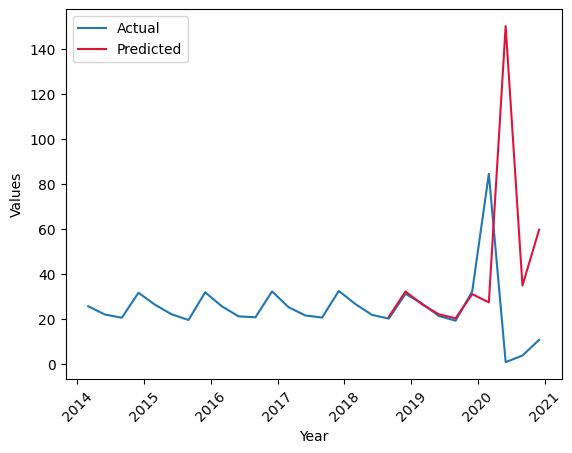

In [25]:
plt.plot(df2['time'], X, label='Actual')
plt.plot(df2['time'][size:len(X)], predictions, 'crimson', label='Predicted')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()